In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 

In [67]:
data = pd.read_csv("data/Egypt_Houses_Price.csv")

In [4]:
data.head()

,Type,Price,Bedrooms,Bathrooms,Area,Furnished,Level,Compound,Payment_Option,Delivery_Date,Delivery_Term,City
0,Duplex,4000000,3.0,3.0,400.0,No,7,Unknown,Cash,Ready to move,Finished,Nasr City
1,Apartment,4000000,3.0,3.0,160.0,No,10+,Unknown,Cash,Ready to move,Finished,Camp Caesar
2,Apartment,2250000,3.0,2.0,165.0,No,1,Unknown,Cash,Ready to move,Finished,Smoha
3,Apartment,1900000,3.0,2.0,230.0,No,10,Unknown,Cash,Ready to move,Finished,Nasr City
4,Apartment,5800000,2.0,3.0,160.0,No,Ground,Eastown,Cash,Ready to move,Semi Finished,New Cairo - El Tagamoa


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27361 entries, 0 to 27360
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Type            27361 non-null  object
 1   Price           27359 non-null  object
 2   Bedrooms        27158 non-null  object
 3   Bathrooms       27190 non-null  object
 4   Area            26890 non-null  object
 5   Furnished       27361 non-null  object
 6   Level           27361 non-null  object
 7   Compound        27361 non-null  object
 8   Payment_Option  27361 non-null  object
 9   Delivery_Date   27361 non-null  object
 10  Delivery_Term   27361 non-null  object
 11  City            27361 non-null  object
dtypes: object(12)
memory usage: 2.5+ MB


In [69]:
# data['Bedrooms'] = pd.to_numeric(data['Bedrooms'], errors='coerce')
# data['Bathrooms'] = pd.to_numeric(data['Bathrooms'], errors='coerce')
# data['Area'] = pd.to_numeric(data['Area'], errors='coerce')

data.Level.unique()

array(['7', '10+', '1', '10', 'Ground', 'Highest', '3', '2', '4', '9',
       '5', '8', '6', 'Unknown'], dtype=object)

In [20]:
data.Price.unique()

array(['4000000', '2250000', '1900000', ..., '6276000', '11950000',
       '12284000'], dtype=object)

In [74]:
# Étape 1: Remplacer les valeurs catégoriques problématiques
data.Bathrooms = data.Bathrooms.replace("Unknown", np.nan)  # Remplacer 'Unknown' par NaN
data.Bathrooms = data.Bathrooms.replace('10+', '10') 
data.Bathrooms = pd.to_numeric(data['Bathrooms'], errors='coerce')

data.Level = data.Level.replace("Unknown", np.nan)  # Remplacer 'Unknown' par NaN
data.Level = data.Level.replace('10+', '11') 
data.Level = data.Level.replace('Ground', '0') 
data.Level = data.Level.replace('Highest', '12') 
data.Level = pd.to_numeric(data['Level'], errors='coerce')

data.Bedrooms = data.Bedrooms.replace("Unknown", np.nan)  # Remplacer 'Unknown' par NaN
data.Bedrooms= data.Bedrooms.replace('10+', '10') 
data.Bedrooms = pd.to_numeric(data['Bedrooms'], errors='coerce')

data.Price = pd.to_numeric(data['Price'], errors='coerce')
data.Area = pd.to_numeric(data.Area, errors='coerce')

In [71]:
#remplacons les valeurs no par 0, yes par 2  et unknown ppar 1
data.Furnished = data.Furnished.replace({"No": 0,"Unknown": 1, "yes":2})
data.Furnished = pd.to_numeric(data.Furnished, errors="coerce")

In [75]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27361 entries, 0 to 27360
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Type            27361 non-null  object 
 1   Price           27322 non-null  float64
 2   Bedrooms        27122 non-null  float64
 3   Bathrooms       27154 non-null  float64
 4   Area            26854 non-null  float64
 5   Furnished       25028 non-null  float64
 6   Level           16922 non-null  float64
 7   Compound        27361 non-null  object 
 8   Payment_Option  27361 non-null  object 
 9   Delivery_Date   27361 non-null  object 
 10  Delivery_Term   27361 non-null  object 
 11  City            27361 non-null  object 
dtypes: float64(6), object(6)
memory usage: 2.5+ MB


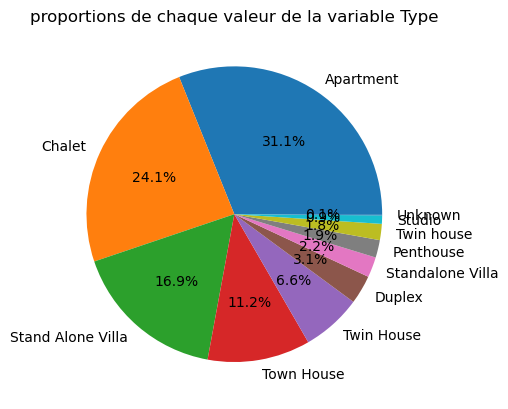

In [26]:
prop_counts = data['Type'].value_counts(normalize=True)

#creation du pie chart
plt.pie(prop_counts, labels=prop_counts.index, autopct='%1.1f%%')
plt.title('proportions de chaque valeur de la variable Type')
plt.show()

In [76]:
data = data[['Type', 'Price', 'Bedrooms', 'Bathrooms', 'Area', 'Furnished', 'Level']]

In [77]:
data.head()

,Type,Price,Bedrooms,Bathrooms,Area,Furnished,Level
0,Duplex,4000000.0,3.0,3.0,400.0,0.0,7.0
1,Apartment,4000000.0,3.0,3.0,160.0,0.0,11.0
2,Apartment,2250000.0,3.0,2.0,165.0,0.0,1.0
3,Apartment,1900000.0,3.0,2.0,230.0,0.0,10.0
4,Apartment,5800000.0,2.0,3.0,160.0,0.0,0.0


In [78]:
from sklearn.preprocessing import OneHotEncoder

#selection des variebles categorielles
cat_vars = ['Type']

#ENcodage binaire des variables categorielles
encoder = OneHotEncoder(sparse_output= False)
cat_data = pd.DataFrame(encoder.fit_transform(data[cat_vars]))
cat_data.columns = encoder.get_feature_names_out(cat_vars)

#remplacement des variables categorielles par les variables encodees
data = pd.concat([data.drop(cat_vars, axis=1), cat_data], axis=1)

In [79]:
data.head()

,Price,Bedrooms,Bathrooms,Area,Furnished,Level,Type_Apartment,Type_Chalet,Type_Duplex,Type_Penthouse,Type_Stand Alone Villa,Type_Standalone Villa,Type_Studio,Type_Town House,Type_Twin House,Type_Twin house,Type_Unknown
0,4000000.0,3.0,3.0,400.0,0.0,7.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,4000000.0,3.0,3.0,160.0,0.0,11.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2250000.0,3.0,2.0,165.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1900000.0,3.0,2.0,230.0,0.0,10.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5800000.0,2.0,3.0,160.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [80]:
data.describe()

,Price,Bedrooms,Bathrooms,Area,Furnished,Level,Type_Apartment,Type_Chalet,Type_Duplex,Type_Penthouse,Type_Stand Alone Villa,Type_Standalone Villa,Type_Studio,Type_Town House,Type_Twin House,Type_Twin house,Type_Unknown
count,2.732200e+04,27122.000000,27154.000000,26854.000000,25028.000000,16922.000000,27361.000000,27361.000000,27361.000000,27361.000000,27361.000000,27361.000000,27361.000000,27361.000000,27361.000000,27361.000000,27361.000000
mean,4.761822e+06,3.242054,2.811446,229.320610,0.340738,2.046212,0.310880,0.240963,0.031468,0.019224,0.169182,0.022221,0.009137,0.112350,0.065604,0.017653,0.001316
std,6.766653e+06,1.212284,1.354443,161.048628,0.473967,2.402325,0.462862,0.427676,0.174582,0.137316,0.374920,0.147406,0.095152,0.315802,0.247594,0.131689,0.036250
min,3.000000e+04,1.000000,1.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.150000e+06,3.000000,2.000000,125.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2.731000e+06,3.000000,3.000000,175.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,5.989000e+06,4.000000,3.000000,275.000000,1.000000,3.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,2.400000e+08,10.000000,10.000000,998.000000,1.000000,12.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [38]:
data.Price.mean()

4761822.340238635

In [81]:
#remplacement des nan par la moyenne
data.Price = data.Price.fillna(4761822.340238635)
data.Bedrooms = data.Bedrooms.fillna(3.0)
data.Bathrooms = data.Bathrooms.fillna(3.0)
data.Area = data.Area.fillna(229.0)
data.Furnished = data.Furnished.fillna(0.0)
data.Level = data.Level.fillna(0.0)

In [82]:
data.describe()

,Price,Bedrooms,Bathrooms,Area,Furnished,Level,Type_Apartment,Type_Chalet,Type_Duplex,Type_Penthouse,Type_Stand Alone Villa,Type_Standalone Villa,Type_Studio,Type_Town House,Type_Twin House,Type_Twin house,Type_Unknown
count,2.736100e+04,27361.000000,27361.000000,27361.000000,27361.000000,27361.000000,27361.000000,27361.000000,27361.000000,27361.000000,27361.000000,27361.000000,27361.000000,27361.000000,27361.000000,27361.000000,27361.000000
mean,4.761822e+06,3.239940,2.812872,229.314669,0.311685,1.265524,0.310880,0.240963,0.031468,0.019224,0.169182,0.022221,0.009137,0.112350,0.065604,0.017653,0.001316
std,6.761828e+06,1.207188,1.349408,159.549485,0.463190,2.134768,0.462862,0.427676,0.174582,0.137316,0.374920,0.147406,0.095152,0.315802,0.247594,0.131689,0.036250
min,3.000000e+04,1.000000,1.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.150000e+06,3.000000,2.000000,125.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2.740000e+06,3.000000,3.000000,179.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,5.950000e+06,4.000000,3.000000,270.000000,1.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,2.400000e+08,10.000000,10.000000,998.000000,1.000000,12.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [147]:
##construction du model

In [83]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures

X = data.drop(columns = ['Price'])
y = data.Price



X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

<h1>Relation entre variable</h1>

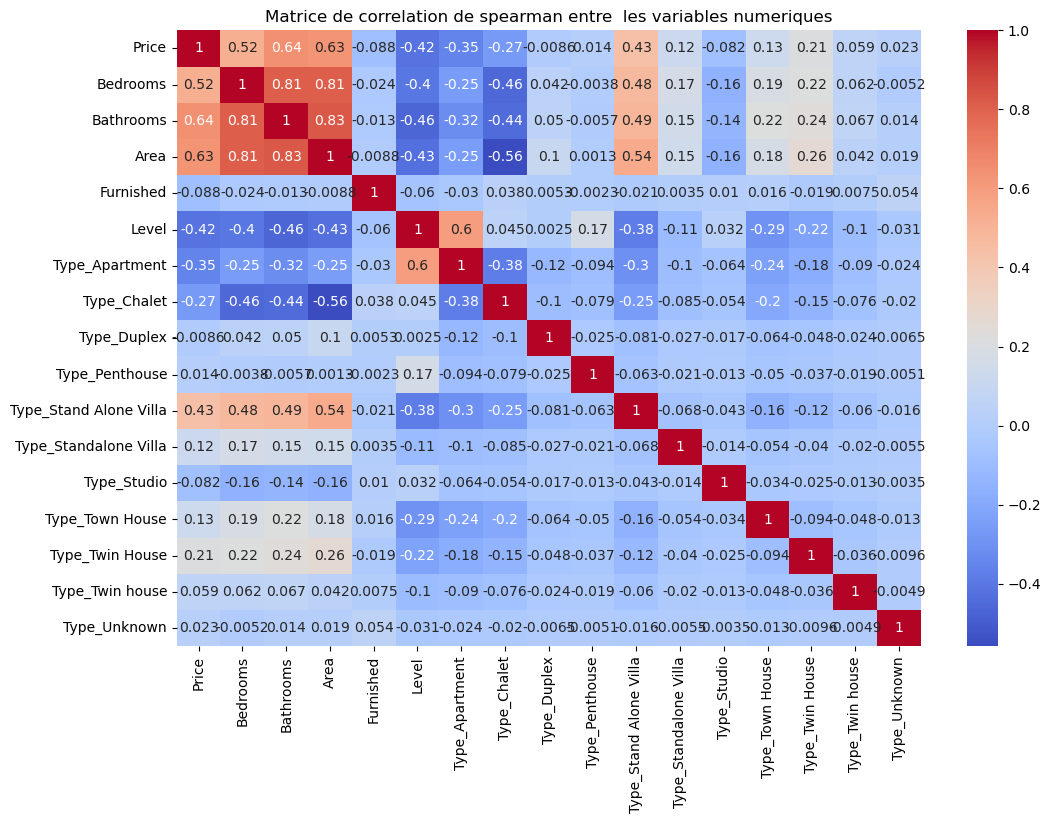

In [84]:
import seaborn as sns
#selection des variables numerique
num_vars = data.select_dtypes(include = np.number).columns
#calcule de la matrice de correlation de spearman
coor_matrix = data[num_vars].corr(method='spearman')

#Affichage de la matrice de correlation de spearman
plt.figure(figsize=(12,8))
sns.heatmap(coor_matrix, annot=True, cmap='coolwarm')
plt.title('Matrice de correlation de spearman entre  les variables numeriques')
plt.show()
# plt.savefig('data/coor.png')

In [34]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [85]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [87]:
model.score(X_train, y_train)

0.4039596836434387

In [88]:
model.score(X_test, y_test)

0.3730347323258659

In [89]:
from sklearn.tree import DecisionTreeRegressor

model2 = DecisionTreeRegressor(random_state = 42)
model2.fit(X_train, y_train)
model2.score(X_test, y_test)

0.25654411668648547

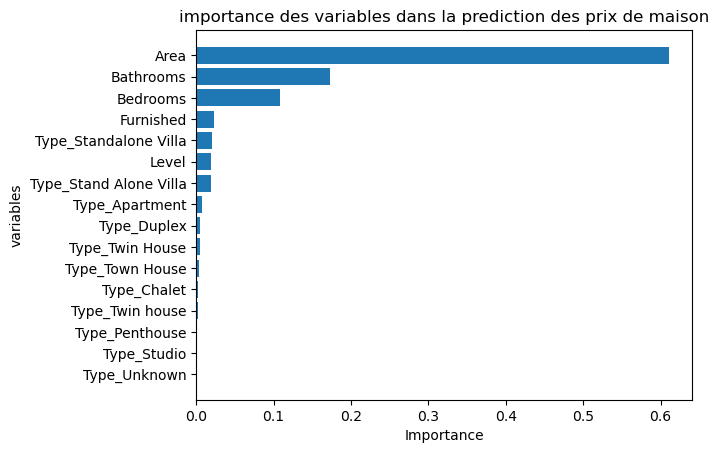

In [90]:
#Affichage de l'importance des variables 
importance = pd.Series(model2.feature_importances_ ,index=X_train.columns)
importance_sorted = importance.sort_values()
plt.barh(importance_sorted.index, importance_sorted)
plt.title('importance des variables dans la prediction des prix de maison')
plt.xlabel('Importance')
plt.ylabel('variables')
plt.show()

In [91]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27361 entries, 0 to 27360
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Price                   27361 non-null  float64
 1   Bedrooms                27361 non-null  float64
 2   Bathrooms               27361 non-null  float64
 3   Area                    27361 non-null  float64
 4   Furnished               27361 non-null  float64
 5   Level                   27361 non-null  float64
 6   Type_Apartment          27361 non-null  float64
 7   Type_Chalet             27361 non-null  float64
 8   Type_Duplex             27361 non-null  float64
 9   Type_Penthouse          27361 non-null  float64
 10  Type_Stand Alone Villa  27361 non-null  float64
 11  Type_Standalone Villa   27361 non-null  float64
 12  Type_Studio             27361 non-null  float64
 13  Type_Town House         27361 non-null  float64
 14  Type_Twin House         27361 non-null

In [92]:
X = data[['Bedrooms', 'Bathrooms', 'Area', 'Furnished','Level', 'Type_Apartment', 'Type_Duplex', 'Type_Stand Alone Villa', 'Type_Standalone Villa']]

In [122]:
from sklearn.preprocessing import PolynomialFeatures
# Transformation polynomiale des features
poly = PolynomialFeatures(degree=2)  # Ajustez le degré du polynôme
X_poly = poly.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size = 0.2, random_state = 42)

In [103]:
model.fit(X_train, y_train)
model.score(X_train, y_train)

0.4490329157608295

In [104]:
model2.fit(X_train, y_train)
model2.score(X_train, y_train)

0.83971718928635

In [106]:
model2.score(X_test, y_test)

0.26341206606058154

Profondeur optimale : 5


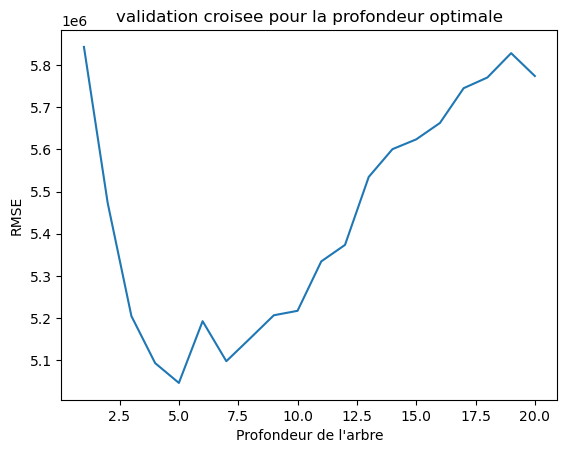

In [99]:
from sklearn.model_selection import GridSearchCV

#definition de la grille de parametre 
param_grid = {'max_depth' : np.arange(1, 21)}

#Instanciation de l'estimateur de l'arbre de decision
tree = DecisionTreeRegressor(random_state=42)

#Instanciation de l'objet GridSearchCV
grid_tree = GridSearchCV(model2, param_grid, cv=5, scoring='neg_mean_squared_error')

#entrainement de l'objet GridSearchCV
grid_tree.fit(X_train, y_train)

#Affichage de la profondeur optimale
print("Profondeur optimale :", grid_tree.best_params_['max_depth'])

#Affichage de la courbe de validation croisee pour la profondeur de l'arbre

plt.plot(param_grid['max_depth'], np.sqrt(-grid_tree.cv_results_['mean_test_score']))
plt.xlabel('Profondeur de l\'arbre')
plt.ylabel('RMSE')
plt.title("validation croisee pour la profondeur optimale")
plt.show()

In [109]:
#Affichage d'un nouvel arbre avec la profondeur optimale
tree_optimal = DecisionTreeRegressor(max_depth = grid_tree.best_params_['max_depth'], random_state=42)
tree_optimal.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=5, random_state=42)

In [110]:
tree_optimal.score(X_train, y_train)

0.5221151784085776

In [113]:
from sklearn.preprocessing import StandardScaler

# Initialisation du StandardScaler
scaler = StandardScaler()

# Ajustement et transformation des données
data_scaled = scaler.fit_transform(data)

print("Données avant standardisation :")
print(data)

print("\nDonnées après standardisation :")
print(data_scaled)

# Affichage de la moyenne et de l'écart type après transformation
print("\nMoyenne par caractéristique après transformation :", data_scaled.mean(axis=0))
print("Écart type par caractéristique après transformation :", data_scaled.std(axis=0))


Données avant standardisation :
            Price  Bedrooms  Bathrooms   Area  Furnished  Level  \
0       4000000.0       3.0        3.0  400.0        0.0    7.0   
1       4000000.0       3.0        3.0  160.0        0.0   11.0   
2       2250000.0       3.0        2.0  165.0        0.0    1.0   
3       1900000.0       3.0        2.0  230.0        0.0   10.0   
4       5800000.0       2.0        3.0  160.0        0.0    0.0   
...           ...       ...        ...    ...        ...    ...   
27356    890000.0       3.0        2.0  240.0        1.0    0.0   
27357   4000000.0       4.0        3.0  218.0        1.0    0.0   
27358  13800000.0       3.0        4.0  308.0        0.0    0.0   
27359  35000000.0       4.0        4.0  478.0        1.0    0.0   
27360   4800000.0       5.0        5.0  229.0        0.0    0.0   

       Type_Apartment  Type_Chalet  Type_Duplex  Type_Penthouse  \
0                 0.0          0.0          1.0             0.0   
1                 1.0        

In [123]:
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [124]:
scaler.fit(y_train)
y_train_scaled = scaler.transform(y_train)
y_test_scaled = scaler.transform(y_test)

ValueError: Expected a 2-dimensional container but got <class 'pandas.core.series.Series'> instead. Pass a DataFrame containing a single row (i.e. single sample) or a single column (i.e. single feature) instead.

In [117]:
print(data_scaled)

[[-0.1126672  -0.19876315  0.13867639 ... -0.26497252 -0.13405255
  -0.03629704]
 [-0.1126672  -0.19876315  0.13867639 ... -0.26497252 -0.13405255
  -0.03629704]
 [-0.37147767 -0.19876315 -0.60240265 ... -0.26497252 -0.13405255
  -0.03629704]
 ...
 [ 1.33667143 -0.19876315  0.87975543 ...  3.77397628 -0.13405255
  -0.03629704]
 [ 4.4719754   0.62962352  0.87975543 ... -0.26497252 -0.13405255
  -0.03629704]
 [ 0.00564616  1.45801018  1.62083447 ... -0.26497252 -0.13405255
  -0.03629704]]


In [ ]:
model2.fit(X_train_scaled, y_train)
model2.score(X_train_scaled, y_train)

0.83971718928635

In [127]:
model2.score(X_test_scaled, y_test)

0.263770282334822